# **Customer Shopping**

Objective: Draw some valuable rules from customer shopping habits to help the company adjust marketing campaign and improve customer experience

In [1]:
#Library and Functions

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
df = pd.read_csv("/kaggle/input/customer-shopping-trends-dataset/shopping_trends_updated.csv")

In [3]:
df.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


**1.Preprocessing Data**

In [4]:
df['Customer ID'].duplicated().sum()

0

In [5]:
age_bins = [18, 30, 40, 50, 60, 70]
age_labels = ['18-29', '30-39', '40-49', '50-59', '60-70']
df['Age'] = pd.cut(df['Age'], age_bins, labels = age_labels,include_lowest = True)

**2. Data exploration**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Customer ID             3900 non-null   int64   
 1   Age                     3900 non-null   category
 2   Gender                  3900 non-null   object  
 3   Item Purchased          3900 non-null   object  
 4   Category                3900 non-null   object  
 5   Purchase Amount (USD)   3900 non-null   int64   
 6   Location                3900 non-null   object  
 7   Size                    3900 non-null   object  
 8   Color                   3900 non-null   object  
 9   Season                  3900 non-null   object  
 10  Review Rating           3900 non-null   float64 
 11  Subscription Status     3900 non-null   object  
 12  Shipping Type           3900 non-null   object  
 13  Discount Applied        3900 non-null   object  
 14  Promo Code Used         

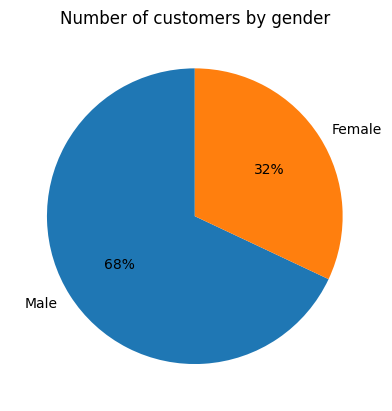

In [7]:
gender_value = df['Gender'].value_counts().keys()
gender_count = df['Gender'].value_counts()
plt.pie(gender_count, labels=gender_value, startangle = 90, autopct='%1.0f%%')
plt.title('Number of customers by gender')
plt.show()

In [8]:
item_purchased = df['Item Purchased'].value_counts().to_frame()
item_purchased.style.background_gradient(cmap='Blues')

,count
Item Purchased,
Blouse,171
Jewelry,171
Pants,171
Shirt,169
Dress,166
Sweater,164
Jacket,163
Belt,161
Sunglasses,161


<Axes: xlabel='Color', ylabel='Item Purchased'>

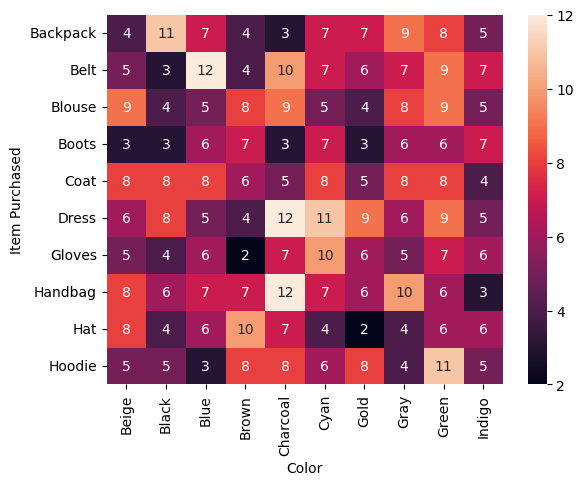

In [9]:
color = df.groupby(['Item Purchased', 'Color'])["Customer ID"].count().unstack().iloc[0:10,0:10]
sns.heatmap(color, annot=True)

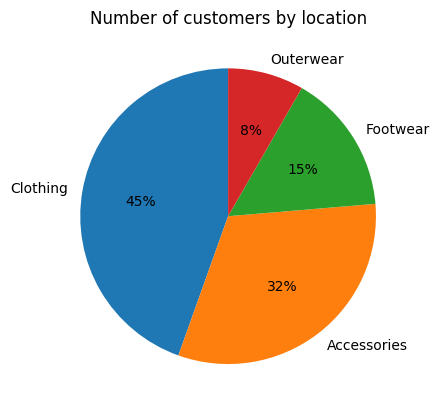

In [10]:
category_value = df['Category'].value_counts().keys()
category_count = df['Category'].value_counts()
plt.pie(category_count, labels=category_value, startangle = 90, autopct='%1.0f%%')
plt.title('Number of customers by location')
plt.show()

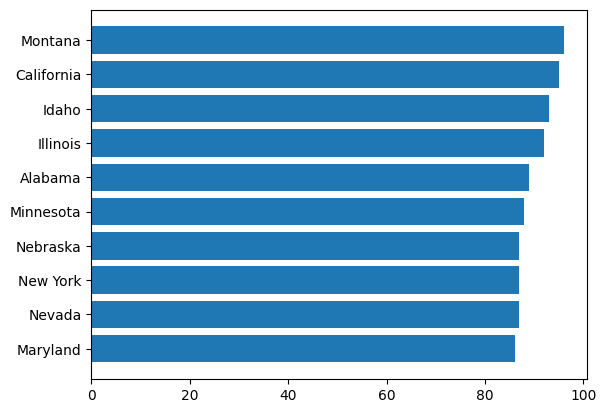

In [11]:
location_value = df["Location"].value_counts().head(10).keys()
location_count = df["Location"].value_counts().head(10)
plt.barh(location_value, location_count)
plt.gca().invert_yaxis()
plt.show()

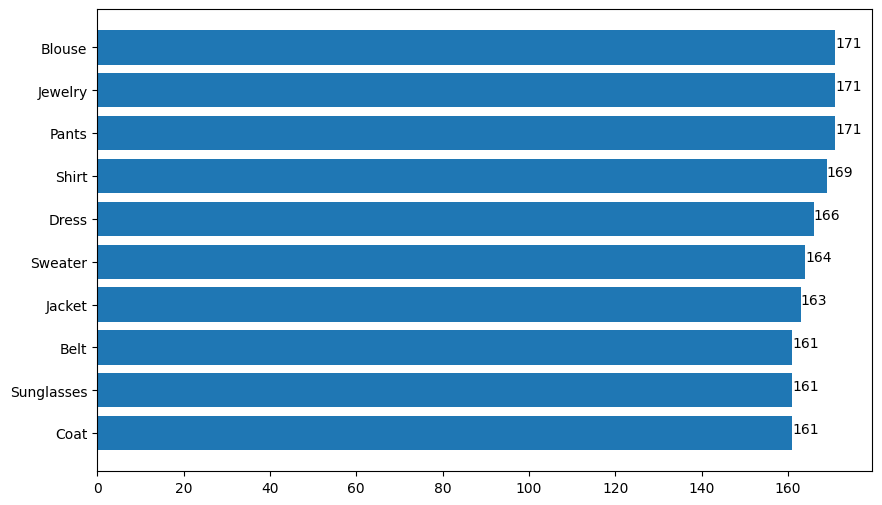

In [12]:
i_val = df["Item Purchased"].value_counts().head(10).keys()
i_count = df["Item Purchased"].value_counts().head(10)
plt.figure(figsize=(10,6))
plt.barh(i_val, i_count)
 
for index, value in enumerate(i_count):
    plt.text(value, index,
             str(value))
 

plt.gca().invert_yaxis()
plt.show()


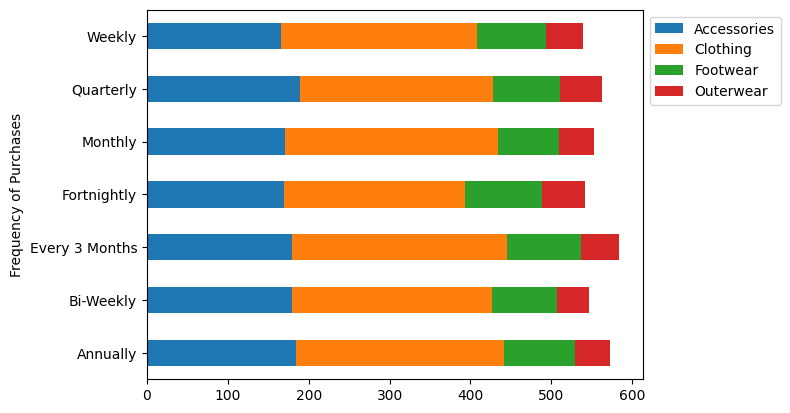

In [13]:
cate_frequence = df.groupby(['Frequency of Purchases', 'Category',])["Category"].count().unstack().reset_index()
cate_frequence.plot( 
    x = 'Frequency of Purchases', 
    kind = 'barh', 
    stacked = True).legend(bbox_to_anchor=(1.0, 1.0))

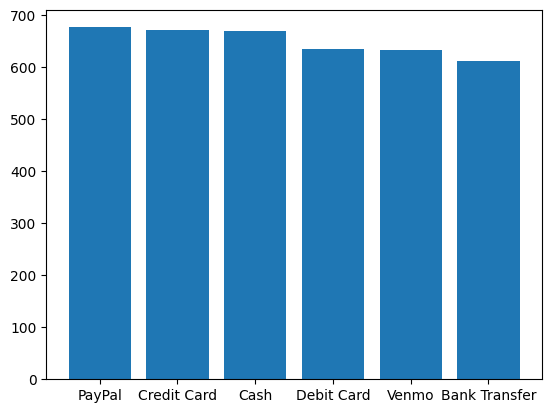

In [14]:
payment_value = df["Payment Method"].value_counts().keys()
payment_count = df["Payment Method"].value_counts()
plt.bar(payment_value, payment_count)
plt.show()

In [15]:
df.groupby(['Discount Applied', 'Promo Code Used'])["Discount Applied"].count().unstack().reset_index().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Discount Applied  2 non-null      object 
 1   No                1 non-null      float64
 2   Yes               1 non-null      float64
dtypes: float64(2), object(1)
memory usage: 176.0+ bytes


<Axes: xlabel='Promo Code Used', ylabel='Discount Applied'>

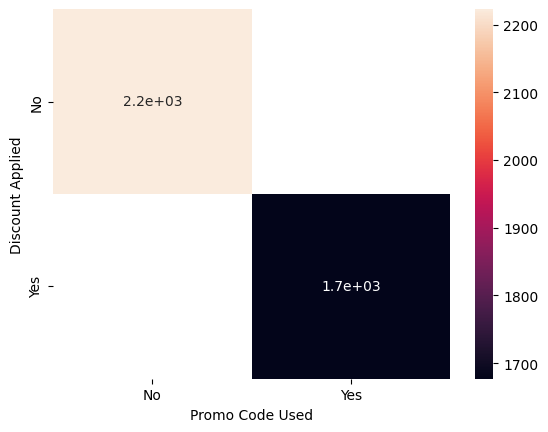

In [16]:
discount_promo = df.groupby(['Discount Applied', 'Promo Code Used',])["Customer ID"].count().unstack()
sns.heatmap(discount_promo, annot = True)

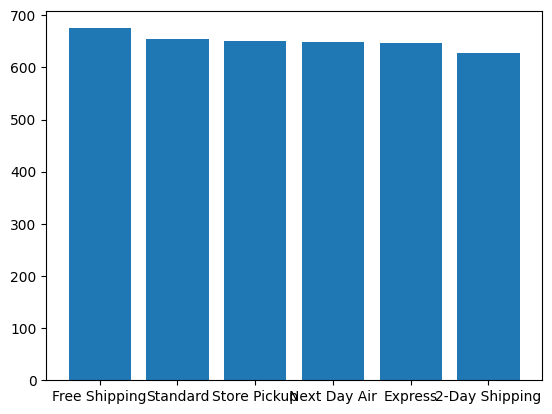

In [17]:
ship_value = df["Shipping Type"].value_counts().keys()
ship_count = df["Shipping Type"].value_counts()
plt.bar(ship_value, ship_count)
plt.show()

**3. Association Rule with Aprior algorithm**

In [18]:
df = df[df['Season'] == 'Summer']

In [19]:
df = df[['Age', 'Frequency of Purchases','Payment Method']]
df

,Age,Frequency of Purchases,Payment Method
5,40-49,Weekly,Venmo
8,18-29,Annually,Venmo
18,50-59,Weekly,Cash
19,60-70,Bi-Weekly,Debit Card
22,50-59,Annually,Debit Card
...,...,...,...
3878,50-59,Annually,Credit Card
3886,30-39,Quarterly,Debit Card
3892,30-39,Fortnightly,PayPal
3895,30-39,Weekly,Venmo


In [20]:
df = pd.DataFrame({col:str(col) + '=' for col in df}, index = df.index) + df.astype(str)
df

,Age,Frequency of Purchases,Payment Method
5,Age=40-49,Frequency of Purchases=Weekly,Payment Method=Venmo
8,Age=18-29,Frequency of Purchases=Annually,Payment Method=Venmo
18,Age=50-59,Frequency of Purchases=Weekly,Payment Method=Cash
19,Age=60-70,Frequency of Purchases=Bi-Weekly,Payment Method=Debit Card
22,Age=50-59,Frequency of Purchases=Annually,Payment Method=Debit Card
...,...,...,...
3878,Age=50-59,Frequency of Purchases=Annually,Payment Method=Credit Card
3886,Age=30-39,Frequency of Purchases=Quarterly,Payment Method=Debit Card
3892,Age=30-39,Frequency of Purchases=Fortnightly,Payment Method=PayPal
3895,Age=30-39,Frequency of Purchases=Weekly,Payment Method=Venmo


In [21]:
df_list = df.to_numpy().tolist()
df_list
dataset = list()
for i in range(len(df_list)):
    dataset.append(df_list[i])

In [22]:
te = TransactionEncoder()
te_array = te.fit(dataset).transform(dataset)
final_df = pd.DataFrame(te_array, columns=te.columns_)

In [23]:
final_df

,Age=18-29,Age=30-39,Age=40-49,Age=50-59,Age=60-70,Frequency of Purchases=Annually,Frequency of Purchases=Bi-Weekly,Frequency of Purchases=Every 3 Months,Frequency of Purchases=Fortnightly,Frequency of Purchases=Monthly,Frequency of Purchases=Quarterly,Frequency of Purchases=Weekly,Payment Method=Bank Transfer,Payment Method=Cash,Payment Method=Credit Card,Payment Method=Debit Card,Payment Method=PayPal,Payment Method=Venmo
0,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
1,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False
3,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False
951,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False
952,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False
953,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True


In [24]:
frequent_itemsets = apriori(final_df, min_support=0.009, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.253403,(Age=18-29)
1,0.178010,(Age=30-39)
2,0.193717,(Age=40-49)
3,0.195812,(Age=50-59)
4,0.179058,(Age=60-70)
...,...,...
130,0.010471,"(Frequency of Purchases=Every 3 Months, Paymen..."
131,0.009424,"(Frequency of Purchases=Monthly, Age=50-59, Pa..."
132,0.009424,"(Age=50-59, Payment Method=Bank Transfer, Freq..."
133,0.009424,"(Age=60-70, Payment Method=Debit Card, Frequen..."


In [25]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.5)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
specific_word = 'Age'
filtered_rules = rules[rules['antecedents'].apply(lambda x:  any(specific_word in item for item in x))]
filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
26,"(Frequency of Purchases=Monthly, Age=50-59)",(Payment Method=PayPal),0.023037,0.167539,0.009424,0.409091,2.441761,0.005565,1.408780,0.604383
33,"(Age=50-59, Frequency of Purchases=Weekly)",(Payment Method=Bank Transfer),0.026178,0.167539,0.009424,0.360000,2.148750,0.005038,1.300720,0.548984
16,"(Frequency of Purchases=Fortnightly, Age=30-39)",(Payment Method=Cash),0.027225,0.169634,0.009424,0.346154,2.040598,0.004806,1.269972,0.524220
1,"(Frequency of Purchases=Monthly, Age=18-29)",(Payment Method=Venmo),0.032461,0.164398,0.010471,0.322581,1.962194,0.005135,1.233508,0.506818
45,"(Age=60-70, Frequency of Purchases=Weekly)",(Payment Method=Cash),0.029319,0.169634,0.009424,0.321429,1.894841,0.004451,1.223698,0.486516
15,"(Payment Method=Cash, Age=30-39)",(Frequency of Purchases=Fortnightly),0.030366,0.132984,0.009424,0.310345,2.333695,0.005386,1.257173,0.589393
38,"(Age=60-70, Payment Method=Debit Card)",(Frequency of Purchases=Quarterly),0.030366,0.150785,0.009424,0.310345,2.058190,0.004845,1.231361,0.530238
22,"(Payment Method=Venmo, Age=40-49)",(Frequency of Purchases=Every 3 Months),0.035602,0.159162,0.010471,0.294118,1.847910,0.004805,1.191187,0.475787
39,"(Age=60-70, Frequency of Purchases=Quarterly)",(Payment Method=Debit Card),0.032461,0.165445,0.009424,0.290323,1.754798,0.004054,1.175964,0.444565
6,"(Frequency of Purchases=Quarterly, Age=18-29)",(Payment Method=Bank Transfer),0.043979,0.167539,0.012565,0.285714,1.705357,0.005197,1.165445,0.432640


Customers from 50-59 years old often use bank cards or Paypal for shopping, the company can cooperate with banks and Paypal to design a discount program aimed at this group to encourage them to spend more. Customers between the ages of 18-29 who spend regularly every month often use Venmo for payment, the company can create monthly point accumulation programs for the segment of customers to encourage them to spend more each month...